In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D
from tensorflow.keras import Sequential
input = np.random.random((3,32,32))

class LeNet:
  lenet = tf.keras.Sequential()
  lenet.add(Conv2D(6,(5,5), activation='tanh', padding='valid', input_shape=(32,32,3)))
  lenet.add(AveragePooling2D((2,2)))
  lenet.add(Conv2D(16,(5,5), activation='tanh', padding='valid'))
  lenet.add(AveragePooling2D((2,2)))
  lenet.add(Flatten())
  lenet.add(Dense(120, activation='tanh'))
  lenet.add(Dense(84, activation='tanh'))
  lenet.add(Dense(10, activation='softmax'))
  lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [17]:
class LeNet2:
  lenet = tf.keras.Sequential()
  lenet.add(Conv2D(6,(5,5), activation='tanh', padding='valid', input_shape=(32,32,1)))
  lenet.add(AveragePooling2D((2,2)))
  lenet.add(Conv2D(16,(5,5), activation='tanh', padding='valid'))
  lenet.add(AveragePooling2D((2,2)))
  lenet.add(Flatten())
  lenet.add(Dense(120, activation='tanh'))
  lenet.add(Dense(84, activation='tanh'))
  lenet.add(Dense(10, activation='softmax'))
  lenet.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [6]:
class LeNet3:
  lenet = tf.keras.Sequential()
  lenet.add(Conv2D(6,(5,5), activation='tanh', padding='valid', input_shape=(32, 32, 1)))  # C1
  lenet.add(AveragePooling2D((2,2)))                                                     # S2
  lenet.add(Conv2D(16,(5,5), activation='tanh', padding='valid'))                        # C3
  lenet.add(AveragePooling2D((2,2)))                                                     # S4
  lenet.add(Conv2D(120,(5,5), activation='tanh', padding='valid'))                       # C5
  lenet.add(Flatten())                    
  lenet.add(Dense(84, activation='tanh'))                                                # F6
  lenet.add(Dense(10, activation='softmax'))                                             # OutLayer
  lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)   #x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)     #x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

In [9]:
x_train = np.pad(x_train, ((0, 0), (2,2), (2,2), (0,0)),'constant')
x_test = np.pad(x_test, ((0, 0), (2,2), (2,2), (0,0)),'constant')


In [10]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [48]:
lenet = LeNet3().lenet
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = lenet.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_train, y_train_encoded))

Epoch 1/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.5550 - accuracy: 0.7976 - val_loss: 0.3250 - val_accuracy: 0.8820
Epoch 2/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3293 - accuracy: 0.8789 - val_loss: 0.3083 - val_accuracy: 0.8849
Epoch 3/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2935 - accuracy: 0.8897 - val_loss: 0.2708 - val_accuracy: 0.8985
Epoch 4/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2723 - accuracy: 0.8975 - val_loss: 0.2629 - val_accuracy: 0.8988
Epoch 5/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2584 - accuracy: 0.9016 - val_loss: 0.2341 - val_accuracy: 0.9111
Epoch 6/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2404 - accuracy: 0.9094 - val_loss: 0.2237 - val_accuracy: 0.9150
Epoch 7/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2304 - accuracy: 0.9123 - val_loss: 0.2112 -

In [51]:
loss, accuracy =lenet.evaluate(x_test, y_test_encoded, verbose=0)
print(accuracy)

0.9000999927520752


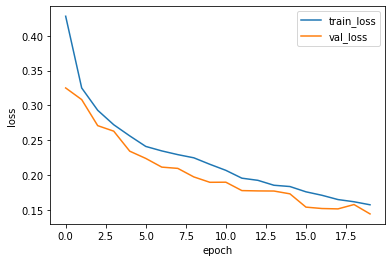

In [52]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

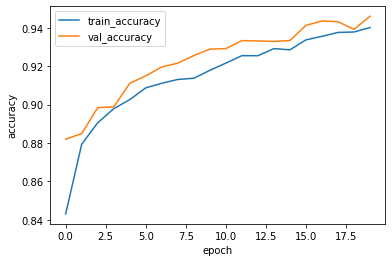

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [11]:
lenet2 = LeNet3().lenet
lenet2.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = lenet2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_train, y_train_encoded))

Epoch 1/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.5762 - accuracy: 0.7934 - val_loss: 0.3367 - val_accuracy: 0.8760
Epoch 2/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3210 - accuracy: 0.8806 - val_loss: 0.2774 - val_accuracy: 0.8956
Epoch 3/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2807 - accuracy: 0.8948 - val_loss: 0.2559 - val_accuracy: 0.9045
Epoch 4/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2577 - accuracy: 0.9045 - val_loss: 0.2533 - val_accuracy: 0.9039
Epoch 5/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2413 - accuracy: 0.9099 - val_loss: 0.2277 - val_accuracy: 0.9157
Epoch 6/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2319 - accuracy: 0.9126 - val_loss: 0.2106 - val_accuracy: 0.9207
Epoch 7/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2200 - accuracy: 0.9168 - val_loss: 0.2152 -

In [12]:
loss, accuracy =lenet2.evaluate(x_test, y_test_encoded, verbose=0)
print(accuracy)

0.9034000039100647


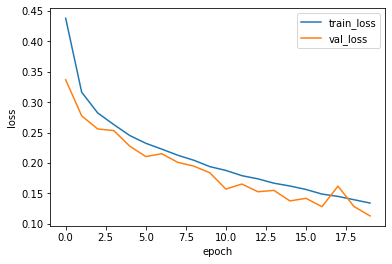

In [14]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

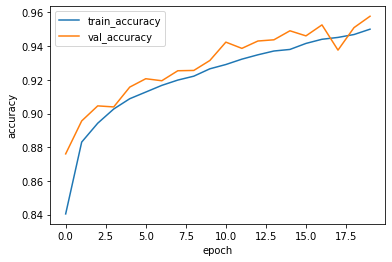

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [17]:
lenet3 = LeNet3().lenet
lenet3.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = lenet3.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_train, y_train_encoded))

Epoch 1/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3990 - accuracy: 0.8585 - val_loss: 0.2660 - val_accuracy: 0.8986
Epoch 2/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2488 - accuracy: 0.9049 - val_loss: 0.2406 - val_accuracy: 0.9079
Epoch 3/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2385 - accuracy: 0.9096 - val_loss: 0.3401 - val_accuracy: 0.8745
Epoch 4/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2817 - accuracy: 0.8957 - val_loss: 0.2044 - val_accuracy: 0.9217
Epoch 5/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2053 - accuracy: 0.9227 - val_loss: 0.1953 - val_accuracy: 0.9253
Epoch 6/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1916 - accuracy: 0.9282 - val_loss: 0.1720 - val_accuracy: 0.9346
Epoch 7/20
1875/1875 [==============================] - 55s 30ms/step - loss: 0.1849 - accuracy: 0.9288 - val_loss: 0.2146 -

In [18]:
loss, accuracy =lenet3.evaluate(x_test, y_test_encoded, verbose=0)
print(accuracy)

0.8978000283241272


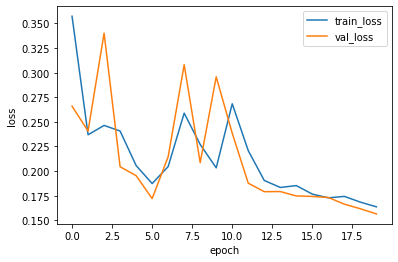

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

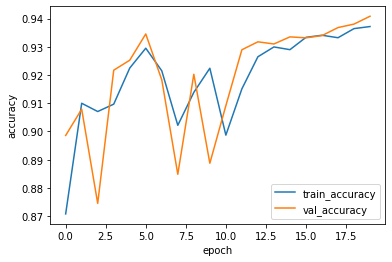

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

(x_train_all_l, y_train_all_l), (x_test_l, y_test_l) = tf.keras.datasets.fashion_mnist.load_data()

x_train_l, x_val_l, y_train_l, y_val_l = train_test_split(x_train_all_l, y_train_all_l, stratify=y_train_all_l, test_size=0.2, random_state=42)
y_train_encoded_l = tf.keras.utils.to_categorical(y_train_l)
y_val_encoded_l = tf.keras.utils.to_categorical(y_val_l)
y_test_encoded_l = tf.keras.utils.to_categorical(y_test_l)

x_train_l = x_train_l.reshape(-1, 28, 28, 1)
x_val_l = x_val_l.reshape(-1, 28, 28, 1)
x_test_l = x_test_l.reshape(-1, 28, 28, 1)

x_train_l = np.pad(x_train_l, ((0, 0), (2,2), (2,2), (0,0)),'constant')
x_val_l = np.pad(x_val_l,((0, 0), (2,2), (2,2), (0,0)),'constant')
x_test_l = np.pad(x_test_l, ((0, 0), (2,2), (2,2), (0,0)),'constant')

x_train_l = x_train_l / 255
x_val_l = x_val_l / 255

In [30]:
lenet4 = LeNet3().lenet
lenet4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = lenet4.fit(x_train_l, y_train_encoded_l, epochs=20, validation_data=(x_val_l, y_val_encoded_l))

Epoch 1/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0660 - accuracy: 0.9758 - val_loss: 0.3154 - val_accuracy: 0.9113
Epoch 2/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0613 - accuracy: 0.9778 - val_loss: 0.3188 - val_accuracy: 0.9103
Epoch 3/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0593 - accuracy: 0.9787 - val_loss: 0.3237 - val_accuracy: 0.9107
Epoch 4/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0517 - accuracy: 0.9823 - val_loss: 0.3340 - val_accuracy: 0.9093
Epoch 5/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0504 - accuracy: 0.9820 - val_loss: 0.3402 - val_accuracy: 0.9114
Epoch 6/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0474 - accuracy: 0.9840 - val_loss: 0.3496 - val_accuracy: 0.9094
Epoch 7/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0463 - accuracy: 0.9837 - val_loss: 0.3599 -

In [25]:
loss, accuracy =lenet4.evaluate(x_test_l, y_test_encoded_l, verbose=0)
print(accuracy) 

0.8456000089645386


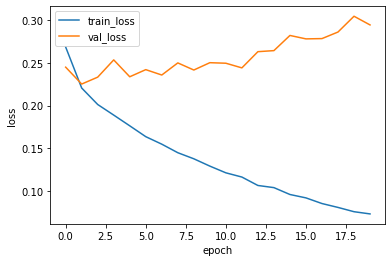

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

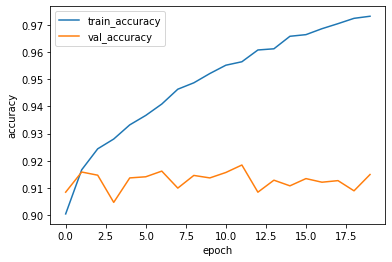

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [28]:
from tensorflow.keras.layers import Dropout
class LeNet4:
  lenet = tf.keras.Sequential()
  lenet.add(Conv2D(6,(5,5), activation='tanh', padding='valid', input_shape=(32, 32, 1)))  # C1
  lenet.add(AveragePooling2D((2,2)))                                                     # S2
  lenet.add(Conv2D(16,(5,5), activation='tanh', padding='valid'))                        # C3
  lenet.add(AveragePooling2D((2,2)))                                                     # S4
  lenet.add(Conv2D(120,(5,5), activation='tanh', padding='valid'))                       # C5
  lenet.add(Flatten())  
  lenet.add(Dropout(0.6))                  
  lenet.add(Dense(84, activation='tanh'))                                                # F6
  lenet.add(Dense(10, activation='softmax'))                                             # OutLayer
  lenet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dropout (Dropout)            (None, 120)              

In [31]:
lenet5 = LeNet4().lenet
lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = lenet5.fit(x_train_l, y_train_encoded_l, epochs=20, validation_data=(x_val_l, y_val_encoded_l))

Epoch 1/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.8560 - accuracy: 0.6813 - val_loss: 0.4604 - val_accuracy: 0.8313
Epoch 2/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.5207 - accuracy: 0.8113 - val_loss: 0.4075 - val_accuracy: 0.8528
Epoch 3/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.4670 - accuracy: 0.8338 - val_loss: 0.3882 - val_accuracy: 0.8572
Epoch 4/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.4455 - accuracy: 0.8416 - val_loss: 0.3654 - val_accuracy: 0.8689
Epoch 5/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.4170 - accuracy: 0.8474 - val_loss: 0.3520 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.4033 - accuracy: 0.8531 - val_loss: 0.3523 - val_accuracy: 0.8724
Epoch 7/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.3952 - accuracy: 0.8560 - val_loss: 0.3489 -

In [33]:
loss, accuracy =lenet5.evaluate(x_test_l, y_test_encoded_l, verbose=0)
print(accuracy)

0.8482999801635742


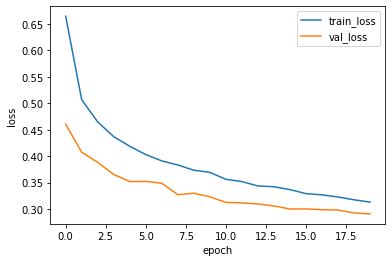

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

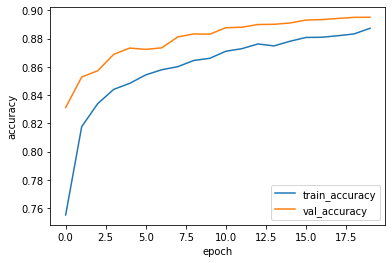

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()